# A Comparative Study of Airbnb Price Determinants in London on Weekends and Weekdays

In [2]:
import numpy as np # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis
import seaborn as sns # library for visualization
import matplotlib
import matplotlib.pyplot as plt # library for visualization
%matplotlib inline
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error
#to suppress warnings
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

/var/folders/kq/0sdw_4fs1610npbjfklypyt40000gn/T/ipykernel_42943/3044507045.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # library used for data manipulation and analysis


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Read CSV files into DataFrames
weekday_data = pd.read_csv('london_weekdays.csv')
weekend_data = pd.read_csv('london_weekends.csv')

## Understanding the Data

In [ ]:
# Concatenate DataFrames
combined_data = pd.concat([weekday_data, weekend_data], axis=0)

In [ ]:
# Add a column to differentiate weekdays and weekends
combined_data['DayType'] = ['Weekday'] * len(weekday_data) + ['Weekend'] * len(weekend_data)

In [ ]:
combined_data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,DayType
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,...,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531,Weekday
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,...,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343,Weekday
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,...,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407,Weekday
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,...,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292,Weekday
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,...,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728,Weekday


In [ ]:
# Define columns to drop
columns_to_drop = ['multi', 'biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']

cleaned_combined_data = combined_data.drop(columns=columns_to_drop)

# Save the cleaned datasets back to CSV
cleaned_combined_data.to_csv('cleaned_combined_data.csv', index=False)

In [ ]:
#Check missing values = all data is complete, no missing columns
cleaned_combined_data.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
lng                           0
lat                           0
DayType                       0
dtype: int64

In [ ]:
cleaned_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 5378
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  9993 non-null   int64  
 1   realSum                     9993 non-null   float64
 2   room_type                   9993 non-null   object 
 3   room_shared                 9993 non-null   bool   
 4   room_private                9993 non-null   bool   
 5   person_capacity             9993 non-null   float64
 6   host_is_superhost           9993 non-null   bool   
 7   cleanliness_rating          9993 non-null   float64
 8   guest_satisfaction_overall  9993 non-null   float64
 9   bedrooms                    9993 non-null   int64  
 10  dist                        9993 non-null   float64
 11  metro_dist                  9993 non-null   float64
 12  lng                         9993 non-null   float64
 13  lat                         9993 non-n

In [ ]:
# Define the boolean columns
bool_columns = ['room_shared', 'room_private', 'host_is_superhost']

# Change True/False values to 1/0
cleaned_combined_data[bool_columns] = cleaned_combined_data[bool_columns].astype(int)

# Verify the changes
print(cleaned_combined_data.head())

   Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  570.098074  Entire home/apt            0             0   
1           1  297.984430     Private room            0             1   
2           2  336.790611     Private room            0             1   
3           3  226.722171     Private room            0             1   
4           4  256.355982     Private room            0             1   

   person_capacity  host_is_superhost  cleanliness_rating  \
0              2.0                  0                10.0   
1              2.0                  1                10.0   
2              2.0                  0                10.0   
3              2.0                  1                10.0   
4              3.0                  0                 9.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist      lng  \
0                        98.0         1  5.301018    1.588990 -0.16032   
1                        99.0         1  2.198

In [ ]:
#getting number of columns and rows
cleaned_combined_data.shape

(9993, 15)

In [ ]:
#getting column names
cleaned_combined_data.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'lng',
       'lat', 'DayType'],
      dtype='object')

In [ ]:
duplicate_rows = cleaned_combined_data.duplicated()
# Print the number of duplicate rows
print("Number of duplicate rows in london_weekends:", duplicate_rows.sum())


Number of duplicate rows in london_weekends: 0


In [ ]:
numerical_columns = ['realSum','cleanliness_rating', 'guest_satisfaction_overall','room_shared', 'room_private', 'person_capacity','host_is_superhost', 'bedrooms', 'dist', 'metro_dist']

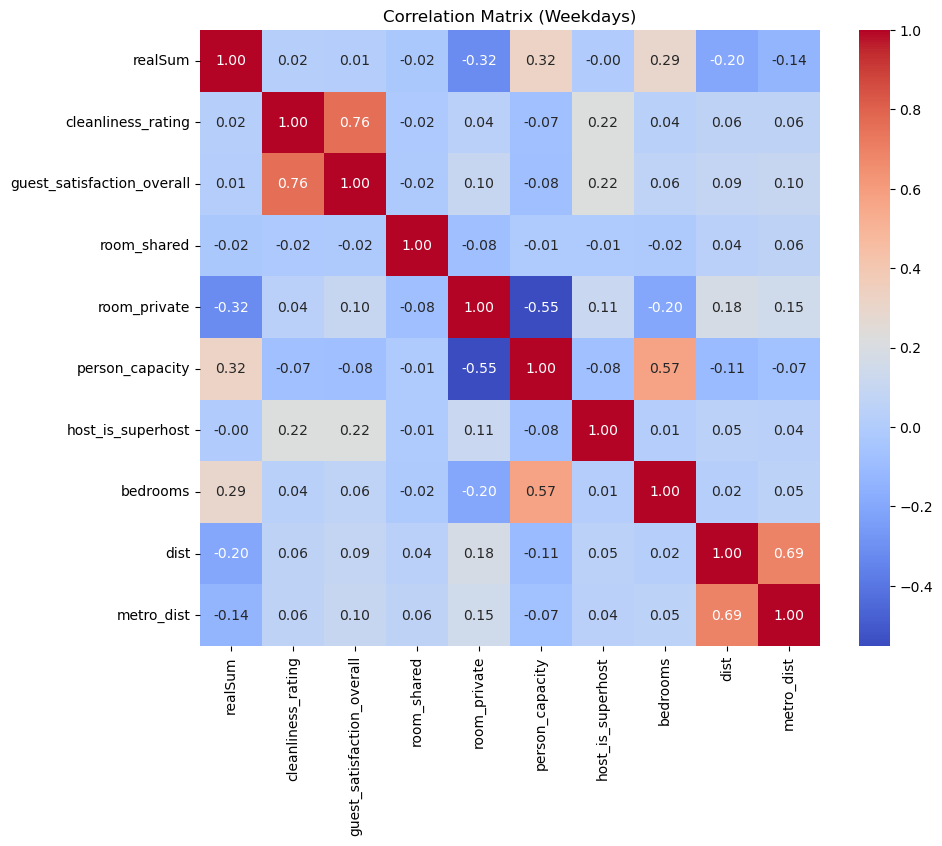

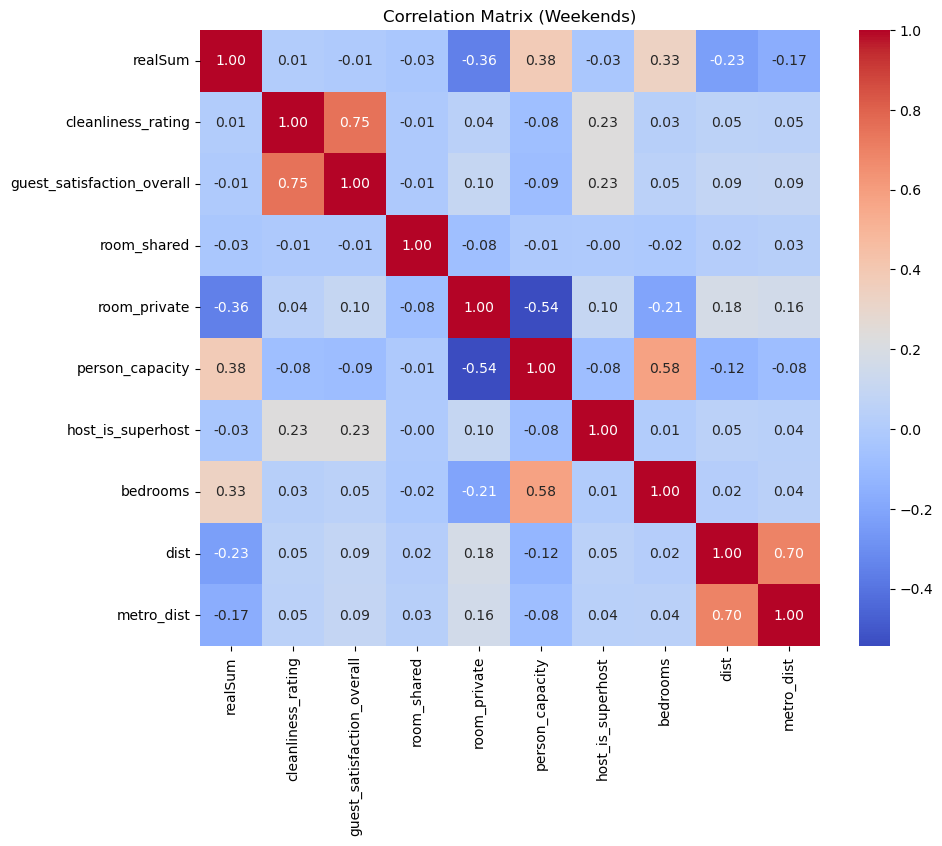

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
weekday_corr = combined_data[combined_data['DayType'] == 'Weekday'][numerical_columns].corr()
sns.heatmap(weekday_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Weekdays)')
plt.show()

plt.figure(figsize=(10, 8))
weekend_corr = combined_data[combined_data['DayType'] == 'Weekend'][numerical_columns].corr()
sns.heatmap(weekend_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Weekends)')
plt.show()

## Exploratory Data Analysis

In [ ]:
# Determining the unique values for Room Type
cleaned_combined_data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
# Creating a count variable to store count of data variables grouped by Room Type
room_count = cleaned_combined_data['room_type'].value_counts() 
print(room_count)

room_type
Private room       5559
Entire home/apt    4384
Shared room          50
Name: count, dtype: int64


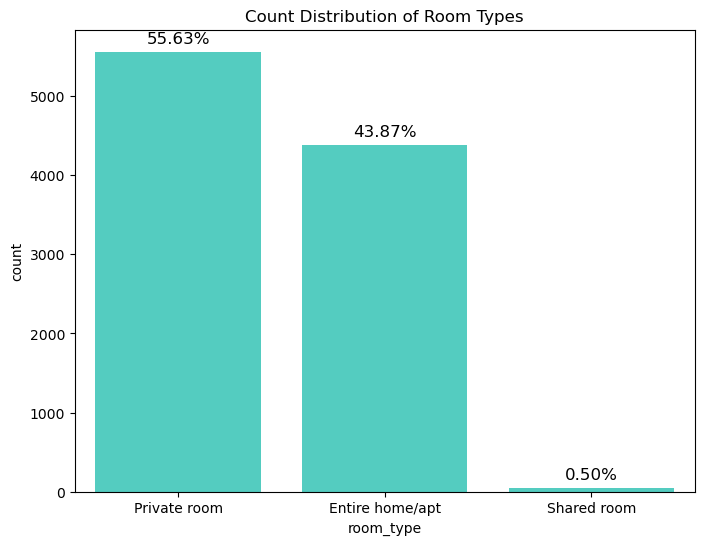

In [ ]:
# Plotting the count plot
plt.figure(figsize = (8,6))
sns.countplot(x = 'room_type', data = cleaned_combined_data, order = room_count.index, color = 'turquoise')
plt.title("Count Distribution of Room Types")

# Displaying the percentage at the centre of the plot
for i in range(room_count.shape[0]):
    count = room_count[i]
    strt = '{:0.2f}%'.format((100 * count)/cleaned_combined_data.shape[0])
    plt.text(i, count + 100, strt, ha = 'center', color = 'black', fontsize = 12)

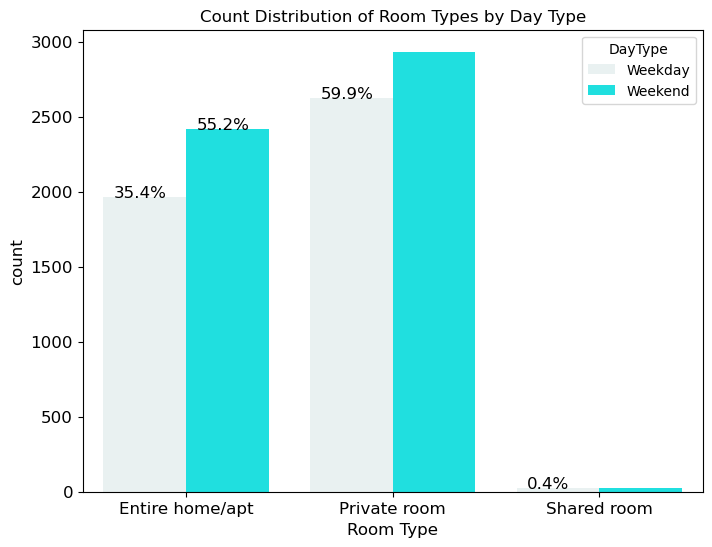

In [ ]:
# Defining a function to assign percentages for grouped count plots
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

# Creating a count plot with hue as DayType
plt.figure(figsize = (8,6))
ax = sns.countplot (x = 'room_type', hue= 'DayType', data = cleaned_combined_data, color = 'cyan')
plt.title("Count Distribution of Room Types by Day Type")
plt.xticks(size = 12)
plt.xlabel('Room Type', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, cleaned_combined_data.room_type,2,2)

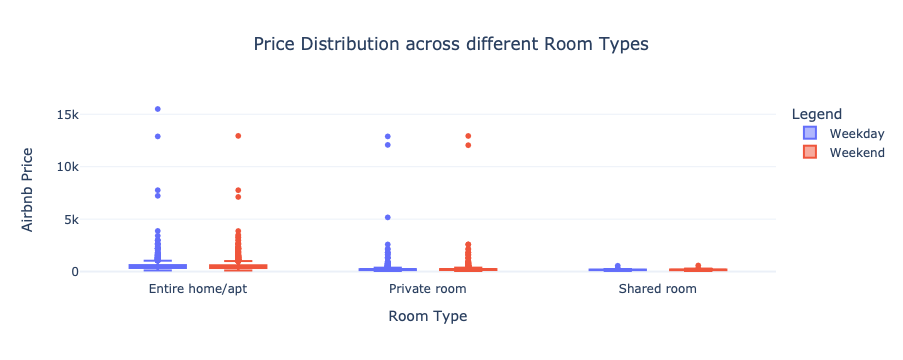

In [ ]:
# Creating a plotly plot for price distribution among different room types
import plotly.express as px

scl = [[0,'rgb(5, 10 172)'], 
       [0.35, 'rgb(40, 60, 190)'],
       [0.5,'rgb(70, 100, 245)'],\
       [0.6, 'rgb(90, 120, 245)'],
       [0.7,'rgb(106, 137, 247)'], 
       [1, 'rgb(220, 220, 220)']]
fig = px. box(cleaned_combined_data, 
              x = 'room_type', 
              y = 'realSum', 
              template = 'plotly_white', 
              title = 'Price Distribution across different Room Types', 
              color = 'DayType')
fig.update_layout(title_x = 0.5, 
                  xaxis_title = "Room Type", 
                  yaxis_title = "Airbnb Price", 
                  legend_title = "Legend")
fig.show()

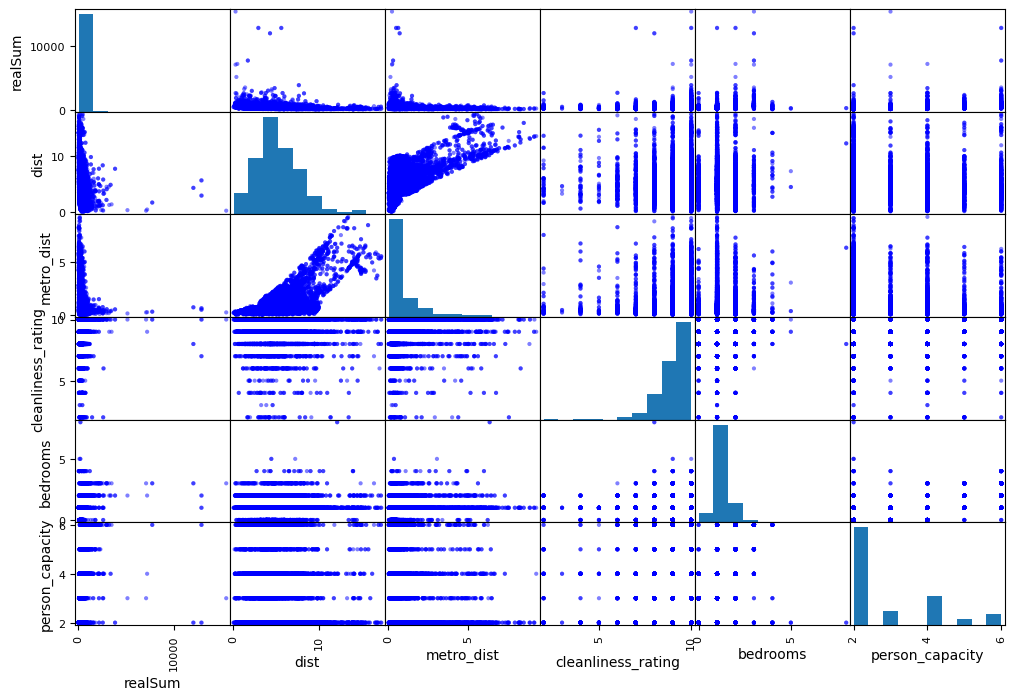

In [ ]:
from pandas.plotting import scatter_matrix

#Creating a scatter matrix to analyse the correlation between Airbnb Price and various variables
attributes = ['realSum', 'dist','metro_dist','cleanliness_rating','bedrooms','person_capacity']
scatter_matrix(cleaned_combined_data[attributes], figsize = (12,8),color = 'blue')
plt.show()

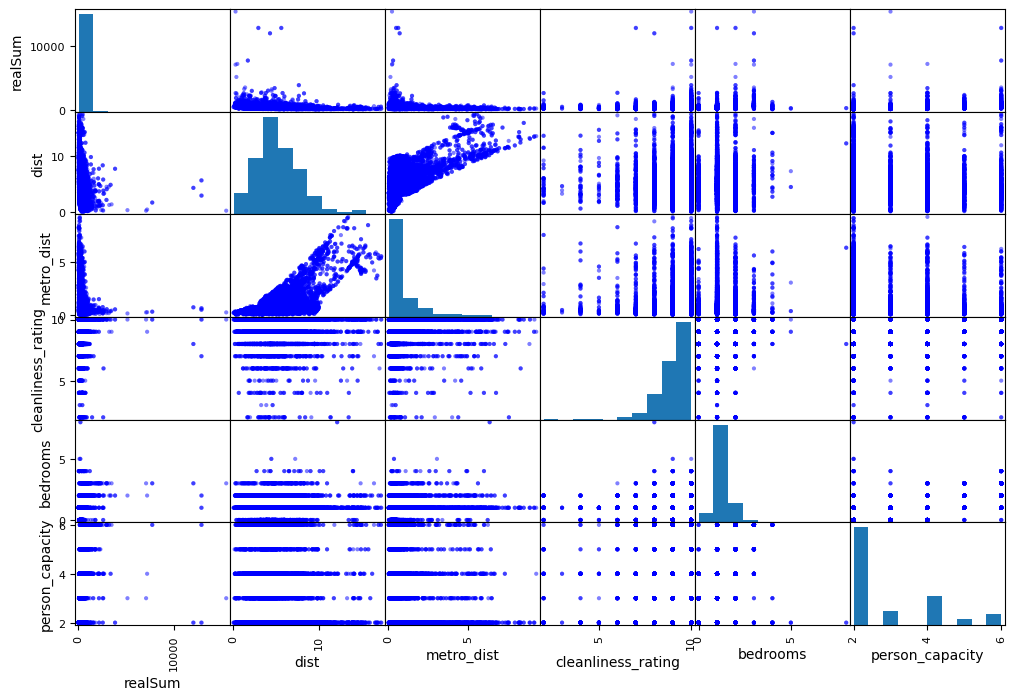

In [ ]:
#Creating a scatter matrix to analyse the correlation between Overall Guest Satisfaction and various variables
attributes = ['realSum', 'dist','metro_dist','cleanliness_rating','bedrooms','person_capacity']
scatter_matrix(cleaned_combined_data[attributes], figsize = (12,8),color = 'blue')
plt.show()

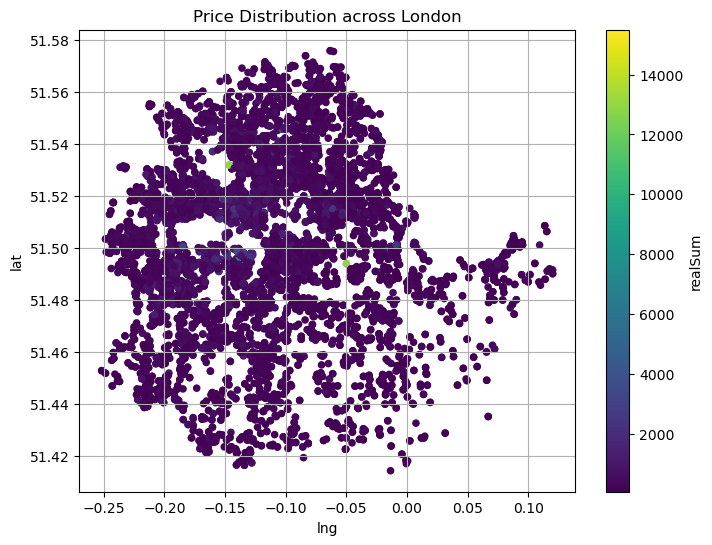

In [ ]:
# Geographical distribution of Airbnb Prices across London
cleaned_combined_data.plot(kind = 'scatter', x = 'lng', y = 'lat', grid = True, figsize = (8,6),
            c = 'realSum', cmap = 'viridis', colorbar = True,
            legend = True, sharex = False)
plt.title("Price Distribution across London")
plt.show()

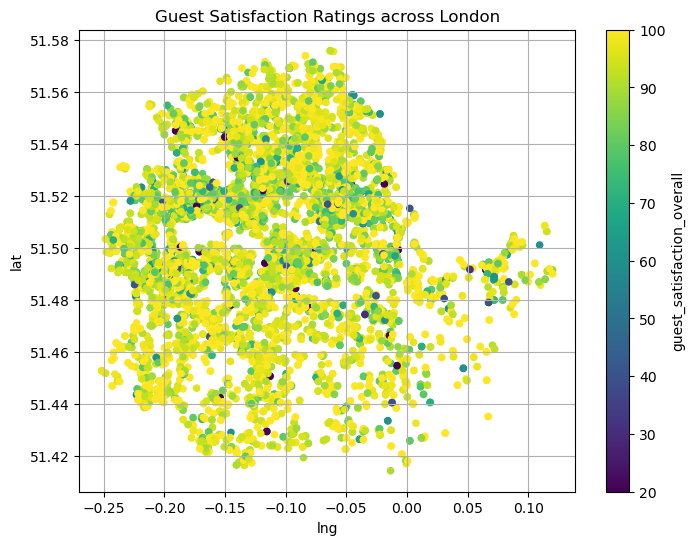

In [ ]:
#Geographical distribution of Guest Satisfaction Ratings across London
cleaned_combined_data.plot(kind = 'scatter', x = 'lng', y = 'lat', grid = True, figsize = (8,6),
            c = 'guest_satisfaction_overall', cmap = 'viridis', colorbar = True,
            legend = True, sharex = False)
plt.title("Guest Satisfaction Ratings across London")
plt.show()

### Creating a Tableau Dashboard Summarising Findings

In [ ]:
#Downloading the dataset as a csv file
cleaned_combined_data.to_csv('london_alldays.csv', index = False)

In [ ]:
#Embedding the Tableau Dashboard in Jupyter Notebook

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1715189247028' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAofAirbnbPricingDeterminantsDataset&#47;AirbnbGuestSatisfaction&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAofAirbnbPricingDeterminantsDataset&#47;AirbnbGuestSatisfaction' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAofAirbnbPricingDeterminantsDataset&#47;AirbnbGuestSatisfaction&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1715189247028');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='2550px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The three most important points in terms of determining Price on both weekdays and weekend are: *Cleanliness*, *Capacity* and *No. of Bedrooms*. However, we decided to analyse distance to city center as capacity and bedrooms are quite closely correlated.

*Guest satisfaction* and *cleanliness* are also very highly correlated.

## Model Building and Deployment

### Multiple Linear Regression

In [ ]:
# Filter the dataset to include only weekend data
weekend_data = cleaned_combined_data[cleaned_combined_data['DayType'] == 'Weekend']

# Define features and target variable
X = weekend_data[['cleanliness_rating', 'person_capacity', 'dist']]
y = weekend_data['realSum']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Regression model
modelLinWeekEnd = LinearRegression()

# Fit the model to the training data
modelLinWeekEnd.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = modelLinWeekEnd.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE) for weekend data with polynomial regression:", rmse)

Root Mean Squared Error (RMSE) for weekend data with polynomial regression: 209.01629979368278


In [ ]:
SLS = np.sum((y_test - y_pred)**2)
print("Sum of Least Squares (SLS) for weekend data with polynomial regression:", SLS)

Sum of Least Squares (SLS) for weekend data with polynomial regression: 47008087.411480315


In [ ]:
# Filter the dataset to include only weekend data
weekday_data = cleaned_combined_data[cleaned_combined_data['DayType'] == 'Weekday']

# Define features and target variable
X = weekday_data[['cleanliness_rating', 'person_capacity', 'dist']]
y = weekday_data['realSum']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=20)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Regression model
modelLinWeekDay = LinearRegression()

# Fit the model to the training data
modelLinWeekDay.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = modelLinWeekDay.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE) for weekday data with polynomial regression:", rmse)

Root Mean Squared Error (RMSE) for weekday data with polynomial regression: 357.0303188468779


In [ ]:
# Make predictions on new data -- CHANGE FACTORS BELOW AS NEEDED 
new_data = pd.DataFrame({'cleanliness_rating': [5.0], 'person_capacity': [5], 'dist': [5.1]})
predicted_price1 = modelLinWeekEnd.predict(new_data)
predicted_price2 = modelLinWeekDay.predict(new_data)
print("Predicted Price for Weekend:", predicted_price1)
print("Predicted Price for Weekday:", predicted_price2)

Predicted Price for Weekend: [577.20387684]
Predicted Price for Weekday: [574.16738353]


In [ ]:
# Make predictions on new data -- CHANGE FACTORS BELOW AS NEEDED 
new_data = pd.DataFrame({'cleanliness_rating': [5.0], 'person_capacity': [5], 'dist': [2.1]})
predicted_price1 = modelLinWeekEnd.predict(new_data)
predicted_price2 = modelLinWeekDay.predict(new_data)
print("Predicted Price for Weekend:", predicted_price1)
print("Predicted Price for Weekday:", predicted_price2)

Predicted Price for Weekend: [671.84412092]
Predicted Price for Weekday: [678.56416777]


From our observations; **room locations closer to the city are more expensive on the weekday, where as on the weekends locations further from the city are more expensive**, consistent with our observations from the exploratory data analysis.

### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
 
# Filter the dataset to include only weekend data
weekend_data = cleaned_combined_data[cleaned_combined_data['DayType'] == 'Weekend']
threshold = 400  # Define threshold for room price
 
# Define features and target variable
X = weekend_data[['cleanliness_rating', 'person_capacity', 'dist']]
y = (weekend_data['realSum'] > threshold).astype(int)  # Define threshold and create binary target variable
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
 
# Initialize MinMaxScaler
scaler = MinMaxScaler()
 
# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Initialize Logistic Regression model
model1 = LogisticRegression()
 
# Fit the model to the training data
model1.fit(X_train_scaled, y_train)
 
# Make predictions on the testing data
y_pred = model1.predict(X_test_scaled)
 
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for weekend prices:", accuracy)

Accuracy for weekend prices: 0.8392193308550185


In [ ]:
# Filter the dataset to include only weekday data
weekday_data = cleaned_combined_data[cleaned_combined_data['DayType'] == 'Weekday']
 
threshold = 400  # Define threshold for room price -- CHANGE TO TEST what we would like to predict
 
# Define features and target variable
X = weekday_data[['cleanliness_rating', 'person_capacity', 'dist']]
y = (weekday_data['realSum'] > threshold).astype(int)  # Define threshold and create binary target variable
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
 
# Initialize MinMaxScaler
scaler = MinMaxScaler()
 
# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# Initialize Logistic Regression model
model2 = LogisticRegression()
 
# Fit the model to the training data
model2.fit(X_train_scaled, y_train)
 
# Make predictions on the testing data
y_pred = model2.predict(X_test_scaled)
 
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for weekday prices:", accuracy)

Accuracy for weekday prices: 0.8407367280606717


In [ ]:
# Make predictions on new data
new_data = pd.DataFrame({'cleanliness_rating': [4.2], 'person_capacity': [4], 'dist': [2.5]})
new_data_scaled = scaler.transform(new_data)  # Scale the new data using the same scaler
 
# Predict the probability of the price being above the threshold for weekend prices
predicted_probability_weekend = model1.predict_proba(new_data_scaled)[:, 1]  # Get the probability of the positive class
print("Probability of Weekend Price being above", threshold, "is :", predicted_probability_weekend)
 
# Predict the probability of the price being above the threshold for weekday prices
predicted_probability_weekday = model2.predict_proba(new_data_scaled)[:, 1]  # Get the probability of the positive class
print("Probability of Weekday Price being above", threshold, "is :", predicted_probability_weekday)

Probability of Weekend Price being above 400 is : [0.5814665]
Probability of Weekday Price being above 400 is : [0.53020184]


### Decision Tree

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Decision Tree - Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - Best Cross-validated Score: -365.5255993851475
Validation Accuracy on Decision Tree: -475.69462462871945


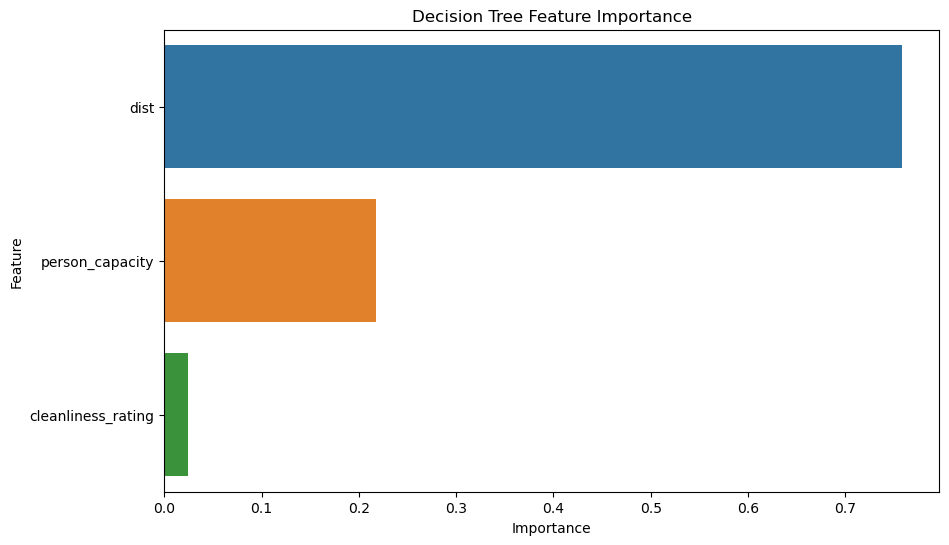

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X_var = cleaned_combined_data[['cleanliness_rating', 'person_capacity', 'dist']]  # Features
Y_var = cleaned_combined_data['realSum']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define numerical features
numerical_features = ['cleanliness_rating', 'person_capacity', 'dist']

# Scale the numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Set up hyperparameters for decision tree
dtt_params = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Define RMSE scorer
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

# Decision Tree
dtt_model = DecisionTreeRegressor(random_state=42)
rmse_scorer = make_scorer(rmse, greater_is_better=False)
dtt_grid_search = GridSearchCV(dtt_model, dtt_params, cv=3, scoring=rmse_scorer, verbose=1)
dtt_grid_search.fit(X_train, y_train)

print("\nDecision Tree - Best Parameters:", dtt_grid_search.best_params_)
print("Decision Tree - Best Cross-validated Score:", dtt_grid_search.best_score_)

# Evaluate on test set
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
dnn_val_score = dtt_grid_search.score(X_test, y_test)
print("Validation Accuracy on Decision Tree:", dnn_val_score)

# Fit the best model and display feature importance
best_dtt_model = dtt_grid_search.best_estimator_

# Fit the best estimator on entire training dataset
best_dtt_model.fit(X_train, y_train)

# Extract feature importance
feature_importance = best_dtt_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the data
X = cleaned_combined_data[['cleanliness_rating', 'person_capacity', 'dist']]  
y = cleaned_combined_data['realSum']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# New data for prediction
new_data = np.array([[8.5, 0.75, 0.9]])  # Replace with actual values

# Predicting the price
predicted_price = model.predict(new_data)
print(f"The predicted Airbnb price is ${predicted_price[0]:.2f}")

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

The predicted Airbnb price is $218.46
RMSE: 472.5551582967082
R-squared: 0.14724053283774496


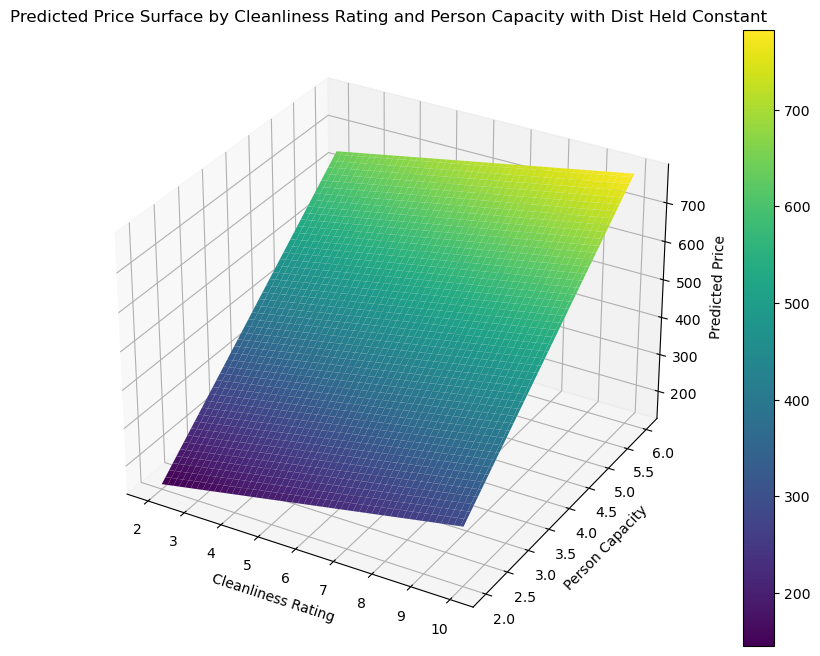

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define features and target
features = ['cleanliness_rating', 'person_capacity', 'dist']
target = 'realSum'

# Prepare the data
X = cleaned_combined_data[features]
y = cleaned_combined_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Now let's prepare to visualize the impact of the top two features while holding the third feature constant

# Generate values for cleanliness_rating and person_capacity within their range for plotting
cleanliness_rating_range = np.linspace(cleaned_combined_data['cleanliness_rating'].min(), cleaned_combined_data['cleanliness_rating'].max(), 100)
person_capacity_range = np.linspace(cleaned_combined_data['person_capacity'].min(), cleaned_combined_data['person_capacity'].max(), 100)
cleanliness_rating, person_capacity = np.meshgrid(cleanliness_rating_range, person_capacity_range)

# Assume dist is held constant at the median of its distribution
constant_dist = np.median(cleaned_combined_data['dist'])

# Generate predictions (z-values) for each combination of cleanliness_rating and person_capacity
z = model.predict(np.array([cleanliness_rating.ravel(), person_capacity.ravel(), np.full(cleanliness_rating.ravel().shape, constant_dist)]).T).reshape(cleanliness_rating.shape)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(cleanliness_rating, person_capacity, z, cmap='viridis')
ax.set_xlabel('Cleanliness Rating')
ax.set_ylabel('Person Capacity')
ax.set_zlabel('Predicted Price')
ax.set_title('Predicted Price Surface by Cleanliness Rating and Person Capacity with Dist Held Constant')
fig.colorbar(surf)
plt.show()


In [ ]:
SLS = np.sum((y_test - y_pred)**2)
print("Sum of Least Squares (SLS) for weekend data with polynomial regression:", SLS)
 
def calculate_rse(y_true, y_pred, n_features):
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    return rse
 
rse_weekend = calculate_rse(y_test, y_pred, X_test.shape[1])
print("Residual Standard Error (RSE)  with linear regression:", rse_weekend)

Sum of Least Squares (SLS) for weekend data with polynomial regression: 446393446.8880211
Residual Standard Error (RSE)  with linear regression: 473.02866057812116


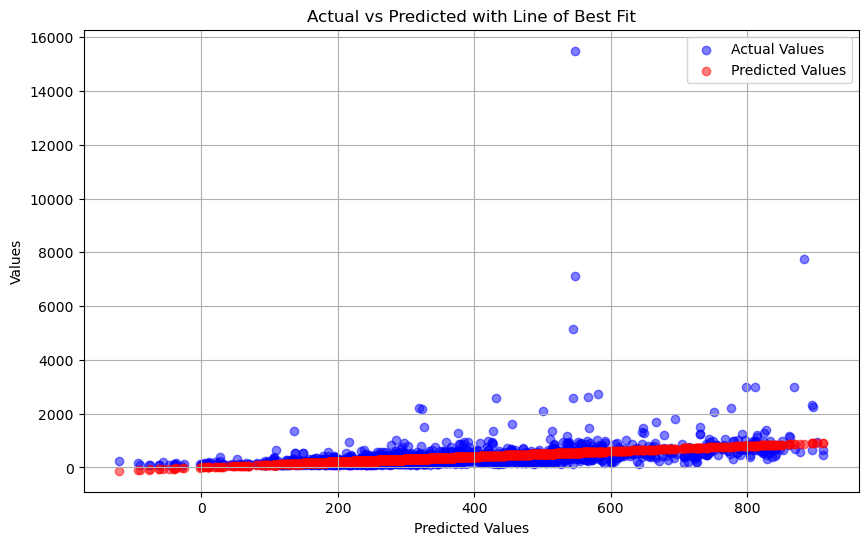

In [ ]:
from scipy import stats


# Calculate residuals for all data
residuals = y_test - y_pred
 
# Fit a line of best fit to the residuals
slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred, residuals)
 
# Ensure the slope is positive
if slope < 0:
    slope *= -1
# Calculate line of best fit
line = slope * y_pred + intercept
 
# Visualize RMSE and residuals with line of best fit
plt.figure(figsize=(10, 6))
 
# Plot actual values as blue dots
plt.scatter(y_pred, y_test, color='blue', alpha=0.5, label='Actual Values')
 
# Plot predicted values as red dots
plt.scatter(y_pred, y_pred, color='red', alpha=0.5, label='Predicted Values')
 
plt.title('Actual vs Predicted with Line of Best Fit')
plt.xlabel('Predicted Values')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

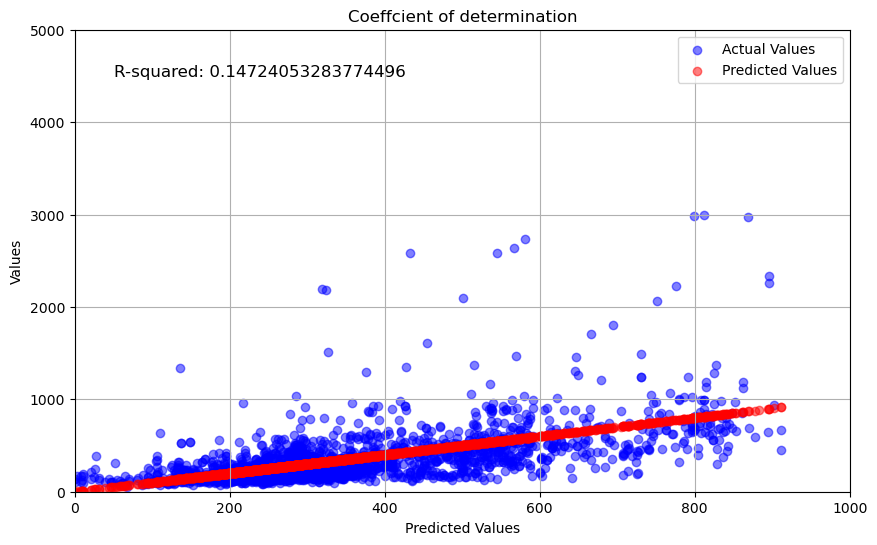

In [ ]:
# Calculate R-squared
r_squared = r_value ** 2
 
# Visualize RMSE and residuals with line of best fit
plt.figure(figsize=(10, 6))
 
# Plot actual values as blue dots
plt.scatter(y_pred, y_test, color='blue', alpha=0.5, label='Actual Values')
 
# Plot predicted values as red dots
plt.scatter(y_pred, y_pred, color='red', alpha=0.5, label='Predicted Values')
  
# Annotate R-squared
plt.text(0.05, 0.9, f'R-squared: {0.14724053283774496}', transform=plt.gca().transAxes, fontsize=12)
 
# Set same scale for both axes and set limits to go up in 50's
plt.xlim(0, 1000)
plt.ylim(0, 5000)
 
plt.title('Coeffcient of determination')
plt.xlabel('Predicted Values')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

154.77906378550935
